In [38]:
from sklearn import tree
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
invasion = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [12]:
y_train = invasion['class']
y_train

0      transport
1      transport
2      transport
3        fighter
4        fighter
         ...    
495      fighter
496    transport
497      fighter
498      fighter
499    transport
Name: class, Length: 500, dtype: object

In [13]:
X_train =  invasion.iloc[:,1:]
X_train

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [14]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, n_estimators=15, random_state=0)
parametrs = {'n_estimators': list(range(10,51,10)), 
             'max_depth': list(range(1,12,2)), 
             'min_samples_leaf': list(range(1,8)),
             'min_samples_split': list(range(2,10,2))
            }
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, n_jobs=-1, cv=3)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [27]:
clf_rf = RandomForestClassifier()

In [28]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
operative_information = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
operative_information

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [29]:
y_pred = clf_rf.predict(operative_information)

In [30]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [33]:
feature_importance = clf_rf.feature_importances_
feature_importance_df = pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importance})
feature_importance_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,volume,0.349546
3,brightness,0.261393
0,g_reflection,0.195300
2,speed,0.140174
1,i_reflection,0.053321
4,time_of_observance,0.000266


In [34]:
space_can_be_a_dangerous_place = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
space_can_be_a_dangerous_place

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [35]:
space_can_be_a_dangerous_place.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


<AxesSubplot:>

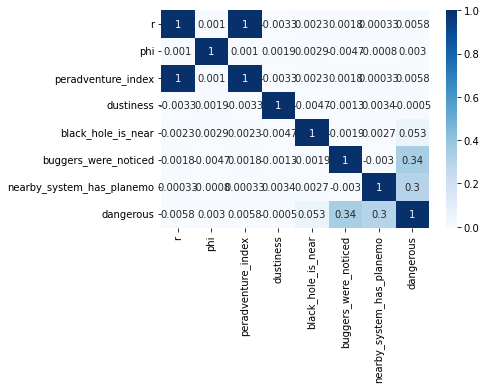

In [43]:
sns.heatmap(space_can_be_a_dangerous_place.corr(), annot=True, cmap="Blues")